In [50]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [51]:
#os.chdir("C:/Users/maryshe/Documents/Data Science_Inernship Worksheets")
df=pd.read_excel("Flight_Webscapped datasets.xlsx",sheet_name="Sheet1")
df

,Airlines,Flight Number,Depature Date,Departure Time,Orgin Place,Arrival Time,Arival date,Arrival Place,Travel time,No. of stops,Price
0,Go First,G8-191/3185,2022-06-26,09:25,New Delhi,17:15,2022-06-26,Mumbai,7h 50m,1 Stop,10651
1,IndiGo,6E-153/605,2022-05-06,19:35,New Delhi,05:30,2022-05-07,Mumbai,9h 55m,1 Stop,11362
2,IndiGo,6E-153/6794,2022-05-06,19:35,New Delhi,00:40,2022-05-07,Mumbai,5h 05m,1 Stop,11467
3,Go First,G8-190/386,2022-06-16,05:20,New Delhi,11:30,2022-06-16,Mumbai,6h 10m,1 Stop,13708
4,Go First,G8-191/3185,2022-05-16,09:25,New Delhi,17:15,2022-05-16,Mumbai,7h 50m,1 Stop,13814
...,...,...,...,...,...,...,...,...,...,...,...
3789,IndiGo,NaN,2022-05-07,19:10,HYD,23:55:00,2022-05-07,BLR,4h 45,1 stop,"₹ 5,866"
3790,Vistara,NaN,2022-05-17,06:00,HYD,23:55:00,2022-05-17,BLR,17h 55,1 stop,"₹ 8,547"
3791,Hahn Air Systems,NaN,2022-05-07,06:10,HYD,23:55:00,2022-05-07,BLR,17h 45,2 stops,"₹ 52,514"
3792,Hahn Air Systems,NaN,2022-05-17,06:10,HYD,23:55:00,2022-05-17,BLR,17h 45,2 stops,"₹ 52,488"


In [52]:
df.shape

(3794, 11)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airlines        3747 non-null   object        
 1   Flight Number   2685 non-null   object        
 2   Depature Date   3794 non-null   datetime64[ns]
 3   Departure Time  3794 non-null   object        
 4   Orgin Place     3794 non-null   object        
 5   Arrival Time    3794 non-null   object        
 6   Arival date     3794 non-null   datetime64[ns]
 7   Arrival Place   3794 non-null   object        
 8   Travel time     3794 non-null   object        
 9   No. of stops    3794 non-null   object        
 10  Price           3794 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 326.2+ KB


In [54]:
df.isnull().sum()

Airlines            47
Flight Number     1109
Depature Date        0
Departure Time       0
Orgin Place          0
Arrival Time         0
Arival date          0
Arrival Place        0
Travel time          0
No. of stops         0
Price                0
dtype: int64

### EDA Needed for this Data Set

## 1.FILLING ARRIVAL DATES


In [55]:
##This is done, To see if the weekend makes a difference is price

df['_name_Depature Date']=df['Depature Date'].dt.day_of_week
df['_name_Arival date']=df['Arival date'].dt.day_of_week

In [56]:
##This is done, To see if the hour of the day makes a difference is price
try:
    df['Departure Time']= pd.to_datetime(df['Departure Time'], format="%H:%M")
    df["hour_Departure Time"] = df['Departure Time'].map(lambda x: x.hour)
    df["Min_Departure Time"] = df['Departure Time'].map(lambda x: x.minute)   
except:
    df['Departure Time']= pd.to_datetime(df['Departure Time'], format="%H:%M:%S")
    df["hour_Departure Time"] = df['Departure Time'].map(lambda x: x.hour)
    df["Min_Departure Time"] = df['Departure Time'].map(lambda x: x.minute)
    df["sec_Departure Time"] = df['Departure Time'].map(lambda x: x.second)
df.drop(['Departure Time'],inplace=True, axis=1)


In [57]:
##This is done, To see if the hour of the day makes a difference is price

df['Arrival Time']= pd.to_datetime(df['Arrival Time'], format="%H:%M",exact= False)
df["hour_Arrival Time"] = df['Arrival Time'].map(lambda x: x.hour)
df["Min_Arrival Time"] = df['Arrival Time'].map(lambda x: x.minute)
df["sec_Arrival Time"] = df['Arrival Time'].map(lambda x: x.second)

df.drop(['Arrival Time'],inplace=True, axis=1)
df.drop(["sec_Arrival Time"],inplace=True, axis=1)


In [58]:
#Let seperate the date in day, months and years and drop the date and year
import datetime
#Column 1(Data of Journey)
df['Depature Date']= pd.to_datetime(df['Depature Date'], format="%d/%m/%Y")
df["Day_Depature Date"] = df['Depature Date'].map(lambda x: x.day)
df["Month_Depature Date"] = df['Depature Date'].map(lambda x: x.month)
df["Year_Depature Date"] = df['Depature Date'].map(lambda x: x.year)
df.drop(['Depature Date'],inplace=True, axis=1)
df.drop(['Year_Depature Date'],inplace=True, axis=1)

In [59]:
#Let seperate the date in day, months and years and drop the date and year
import datetime
#Column 1(Data of Journey)
df['Arival date']= pd.to_datetime(df['Arival date'], format="%d/%m/%Y")
df["Day_Arival date"] = df['Arival date'].map(lambda x: x.day)
df["Month_Arival date"] = df['Arival date'].map(lambda x: x.month)
df["Year_Arival date"] = df['Arival date'].map(lambda x: x.year)
df.drop(['Arival date'],inplace=True, axis=1)
df.drop(['Year_Arival date'],inplace=True, axis=1)

In [60]:
df

,Airlines,Flight Number,Orgin Place,Arrival Place,Travel time,No. of stops,Price,_name_Depature Date,_name_Arival date,hour_Departure Time,Min_Departure Time,hour_Arrival Time,Min_Arrival Time,Day_Depature Date,Month_Depature Date,Day_Arival date,Month_Arival date
0,Go First,G8-191/3185,New Delhi,Mumbai,7h 50m,1 Stop,10651,6,6,9,25,17,15,26,6,26,6
1,IndiGo,6E-153/605,New Delhi,Mumbai,9h 55m,1 Stop,11362,4,5,19,35,5,30,6,5,7,5
2,IndiGo,6E-153/6794,New Delhi,Mumbai,5h 05m,1 Stop,11467,4,5,19,35,0,40,6,5,7,5
3,Go First,G8-190/386,New Delhi,Mumbai,6h 10m,1 Stop,13708,3,3,5,20,11,30,16,6,16,6
4,Go First,G8-191/3185,New Delhi,Mumbai,7h 50m,1 Stop,13814,0,0,9,25,17,15,16,5,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,IndiGo,NaN,HYD,BLR,4h 45,1 stop,"₹ 5,866",5,5,19,10,23,55,7,5,7,5
3790,Vistara,NaN,HYD,BLR,17h 55,1 stop,"₹ 8,547",1,1,6,0,23,55,17,5,17,5
3791,Hahn Air Systems,NaN,HYD,BLR,17h 45,2 stops,"₹ 52,514",5,5,6,10,23,55,7,5,7,5
3792,Hahn Air Systems,NaN,HYD,BLR,17h 45,2 stops,"₹ 52,488",1,1,6,10,23,55,17,5,17,5


In [61]:
#Spliting trael time y hours and mins
df[['Duration_hour','Duration_min']] = df['Travel time'].str.split(' ',expand=True)
df.drop(['Travel time'],inplace=True, axis=1)

In [62]:
## replacing the h and m strings in the columns
df['Duration_hour'] = df['Duration_hour'].replace({'h':''},regex=True)
df['Duration_min'] = df['Duration_min'].replace({'m':''},regex=True)

In [63]:
df

,Airlines,Flight Number,Orgin Place,Arrival Place,No. of stops,Price,_name_Depature Date,_name_Arival date,hour_Departure Time,Min_Departure Time,hour_Arrival Time,Min_Arrival Time,Day_Depature Date,Month_Depature Date,Day_Arival date,Month_Arival date,Duration_hour,Duration_min
0,Go First,G8-191/3185,New Delhi,Mumbai,1 Stop,10651,6,6,9,25,17,15,26,6,26,6,7,50
1,IndiGo,6E-153/605,New Delhi,Mumbai,1 Stop,11362,4,5,19,35,5,30,6,5,7,5,9,55
2,IndiGo,6E-153/6794,New Delhi,Mumbai,1 Stop,11467,4,5,19,35,0,40,6,5,7,5,5,05
3,Go First,G8-190/386,New Delhi,Mumbai,1 Stop,13708,3,3,5,20,11,30,16,6,16,6,6,10
4,Go First,G8-191/3185,New Delhi,Mumbai,1 Stop,13814,0,0,9,25,17,15,16,5,16,5,7,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,IndiGo,NaN,HYD,BLR,1 stop,"₹ 5,866",5,5,19,10,23,55,7,5,7,5,4,45
3790,Vistara,NaN,HYD,BLR,1 stop,"₹ 8,547",1,1,6,0,23,55,17,5,17,5,17,55
3791,Hahn Air Systems,NaN,HYD,BLR,2 stops,"₹ 52,514",5,5,6,10,23,55,7,5,7,5,17,45
3792,Hahn Air Systems,NaN,HYD,BLR,2 stops,"₹ 52,488",1,1,6,10,23,55,17,5,17,5,17,45


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             3747 non-null   object
 1   Flight Number        2685 non-null   object
 2   Orgin Place          3794 non-null   object
 3   Arrival Place        3794 non-null   object
 4   No. of stops         3794 non-null   object
 5   Price                3794 non-null   object
 6   _name_Depature Date  3794 non-null   int64 
 7   _name_Arival date    3794 non-null   int64 
 8   hour_Departure Time  3794 non-null   int64 
 9   Min_Departure Time   3794 non-null   int64 
 10  hour_Arrival Time    3794 non-null   int64 
 11  Min_Arrival Time     3794 non-null   int64 
 12  Day_Depature Date    3794 non-null   int64 
 13  Month_Depature Date  3794 non-null   int64 
 14  Day_Arival date      3794 non-null   int64 
 15  Month_Arival date    3794 non-null   int64 
 16  Durati

In [65]:
df['Duration_min'] = df['Duration_min'].replace(np.nan, 0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             3747 non-null   object
 1   Flight Number        2685 non-null   object
 2   Orgin Place          3794 non-null   object
 3   Arrival Place        3794 non-null   object
 4   No. of stops         3794 non-null   object
 5   Price                3794 non-null   object
 6   _name_Depature Date  3794 non-null   int64 
 7   _name_Arival date    3794 non-null   int64 
 8   hour_Departure Time  3794 non-null   int64 
 9   Min_Departure Time   3794 non-null   int64 
 10  hour_Arrival Time    3794 non-null   int64 
 11  Min_Arrival Time     3794 non-null   int64 
 12  Day_Depature Date    3794 non-null   int64 
 13  Month_Depature Date  3794 non-null   int64 
 14  Day_Arival date      3794 non-null   int64 
 15  Month_Arival date    3794 non-null   int64 
 16  Durati

In [67]:
#drop flight Number which is just a no. not adding any thing to the price

df.drop(['Flight Number'],inplace=True, axis=1)

In [68]:
#df['Airlines'] = df['Airlines'].dropna()
#drop the data whose airlines information is not available

df= df.dropna()

In [69]:
## replacing the objects
df['Price '] = df['Price '].replace({'₹ ':''},regex=True)
df['Price '] = df['Price '].replace({',':''},regex=True)
df['Price '] = df['Price '].replace({'2 left at':''},regex=True)
df['Price '] = df['Price '].replace({'1 left at':''},regex=True)
df['Price '] = df['Price '].replace({'3 left at':''},regex=True)
df['Price '] = df['Price '].replace({'4 left at':''},regex=True)
df['Price '] = df['Price '].replace({'\n  ':''},regex=True)
df['Price '] = df['Price '].replace({']':''},regex=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3793
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             3747 non-null   object
 1   Orgin Place          3747 non-null   object
 2   Arrival Place        3747 non-null   object
 3   No. of stops         3747 non-null   object
 4   Price                3747 non-null   object
 5   _name_Depature Date  3747 non-null   int64 
 6   _name_Arival date    3747 non-null   int64 
 7   hour_Departure Time  3747 non-null   int64 
 8   Min_Departure Time   3747 non-null   int64 
 9   hour_Arrival Time    3747 non-null   int64 
 10  Min_Arrival Time     3747 non-null   int64 
 11  Day_Depature Date    3747 non-null   int64 
 12  Month_Depature Date  3747 non-null   int64 
 13  Day_Arival date      3747 non-null   int64 
 14  Month_Arival date    3747 non-null   int64 
 15  Duration_hour        3747 non-null   object
 16  Durati

In [71]:
df['Price '].unique()

array([10651, 11362, 11467, 13708, 13814, 15388, 15704, 3952, 5009, 5953,
       7319, 7475, 7608, 7687, 7739, 7897, 8054, 9404, 9524, 9832, 9928,
       9944, '10102', '10260', '10364', '10390', '10409', '10417',
       '10432', '10556', '10600', '10610', '10716', '10837', '10862',
       '10889', '10994', '11047', '11071', '11099', '11121', '11413',
       '11511', '11519', '11714', '11924', '11931', '11939', '11961',
       '12070', '12149', '12186', '12351', '12507', '12674', '12884',
       '12989', '13093', '13288', '13646', '14234', '14590', '15193',
       '15388', '15403', '15719', '15914', '16243', '17278', '17594',
       '17819', '18239', '19484', '19588', '19798', '19919', '19971',
       '10127', '10154', '10441', '10651', '11257', '11309', '14128',
       '14444', '15284', '16858', '20114', '23612', '3250', '4373',
       '4425', '4573', '4792', '4799', '5849', '5953', '6373', '7529',
       '7608', '7687', '7739', '7785', '8159', '8737', '8999', '9104',
       '9997', '

In [72]:
df['Price '] = df['Price '].astype('int')
df['Duration_min'] = df['Duration_min'].astype('int')
df['Duration_hour'] = df['Duration_hour'].astype('int')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3793
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             3747 non-null   object
 1   Orgin Place          3747 non-null   object
 2   Arrival Place        3747 non-null   object
 3   No. of stops         3747 non-null   object
 4   Price                3747 non-null   int32 
 5   _name_Depature Date  3747 non-null   int64 
 6   _name_Arival date    3747 non-null   int64 
 7   hour_Departure Time  3747 non-null   int64 
 8   Min_Departure Time   3747 non-null   int64 
 9   hour_Arrival Time    3747 non-null   int64 
 10  Min_Arrival Time     3747 non-null   int64 
 11  Day_Depature Date    3747 non-null   int64 
 12  Month_Depature Date  3747 non-null   int64 
 13  Day_Arival date      3747 non-null   int64 
 14  Month_Arival date    3747 non-null   int64 
 15  Duration_hour        3747 non-null   int32 
 16  Durati

## DATA ANALYSIS VISUALIZATIONS AND ANSWERS

After cleaning the data, you have to do some analysis on the data. 

Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?

What is the best time to buy so that the consumer can save the most by taking the least risk?

Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?

<AxesSubplot:xlabel='Month_Depature Date', ylabel='Price '>

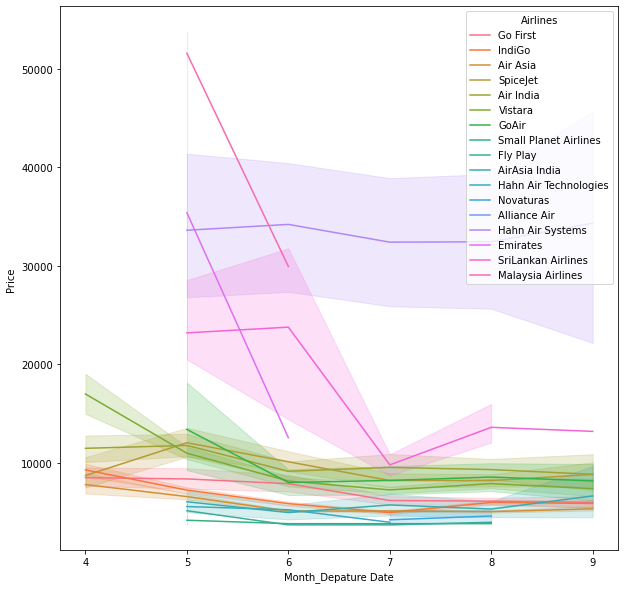

In [74]:
plt.figure(figsize=(10,10),facecolor='white')
sns.lineplot(data=df, x="Month_Depature Date", y='Price ', hue="Airlines")

### Conclusion from above plot

1)Hahn Air systems  are the costly airlines and  change much with the Price , very constanly maintain the price over time

2)Srilankan Airlines and Emrites are the airlines which are costly when departure date is very close and are not available to book on the same day, As there was no data in April month available for booking

3)malaysia Airlines change fluctuate a lot with departure data and other factors

### The price do not  jump drastically when departure dates are close, there are closly when the arival date is very close and there move steadly

#Spice Jet is costly the indigo
#fly pay are the cheapest airlines


### Lets see if the Weekends flights are clostly
 0- Monday
 
 6-Sunday

In [75]:
df["Airlines"].unique()

array(['Go First', 'IndiGo', 'Air Asia', 'SpiceJet', 'Air India',
       'Vistara', 'GoAir', 'Small Planet Airlines', 'Fly Play',
       'AirAsia India', 'Hahn Air Technologies', 'Novaturas',
       'Alliance Air', 'Hahn Air Systems', 'Emirates',
       'SriLankan Airlines', 'Malaysia Airlines'], dtype=object)

<Figure size 1440x720 with 0 Axes>

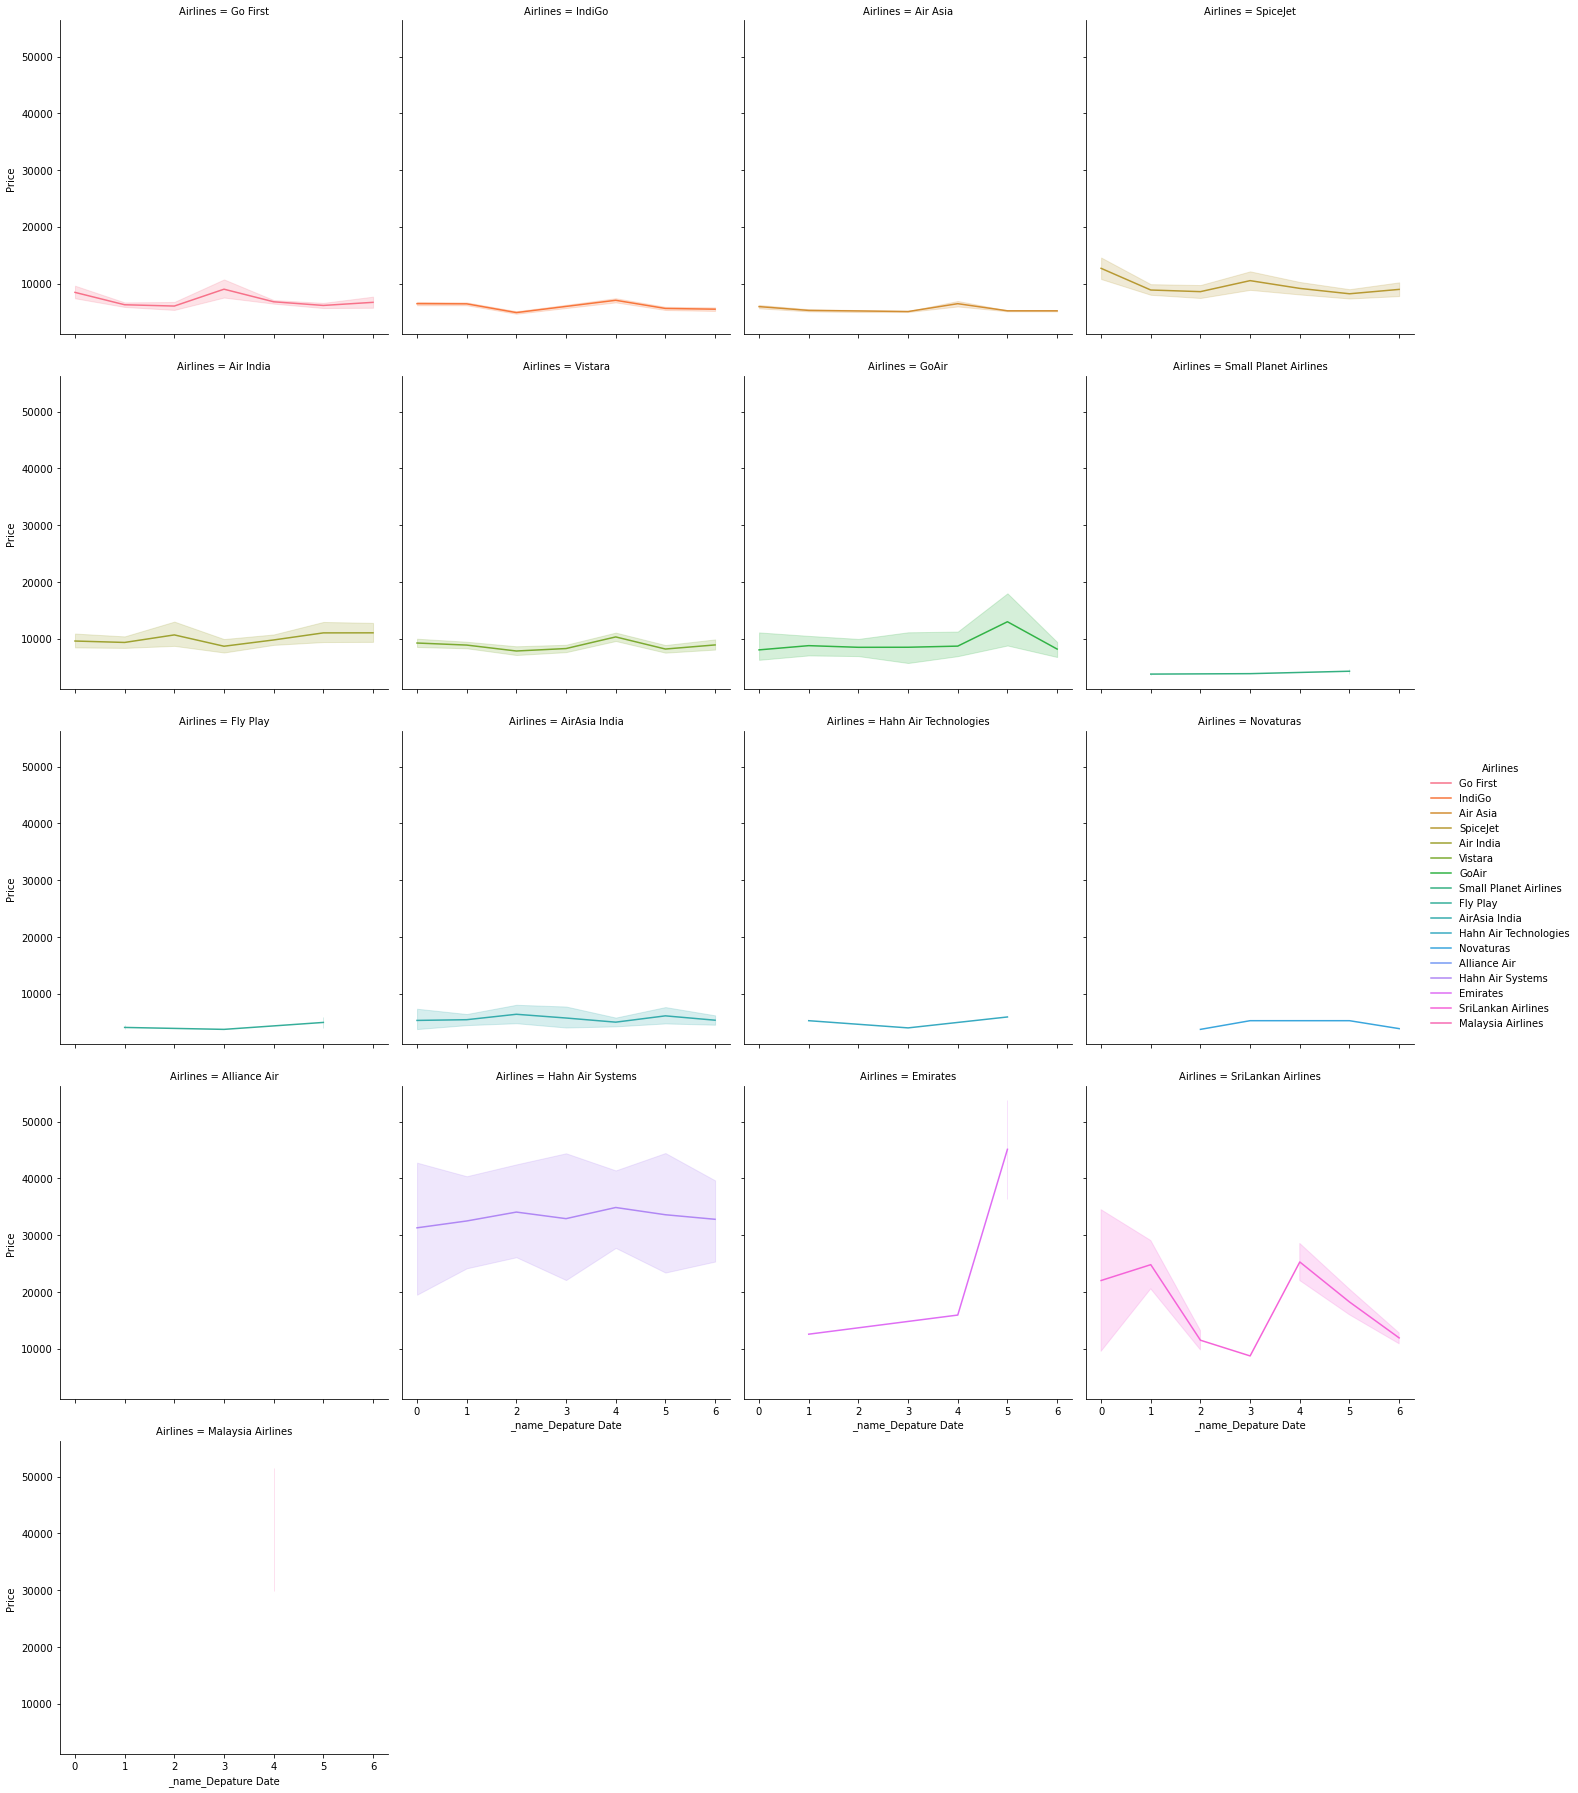

In [76]:
#may_flights = df.query("Airlines=='Go First'") #, 'IndiGo', 'Air Asia', 'SpiceJet', 'Air India','Vistara', 'GoAir', 'Small Planet Airlines', 'Fly Play','AirAsia India', 'Hahn Air Technologies', 'Novaturas','Alliance Air'")
plt.figure(figsize=(20,10),facecolor='white')

sns.relplot(data=df, x="_name_Depature Date", y='Price ', hue="Airlines",col="Airlines",kind='line',col_wrap=4)

#sns.lineplot(data=may_flights, x="Month_Depature Date", y='Price ', hue="Airlines")

## Fluctuation prediction
Hahn Air Technologies'-Price fluction is lot and prices are hicked on weekends

Srilankann Airlines-Fluctuates a lot when departure date is close and over weekends otherwise is more or less stable

Hahn Air Technologies quite stable  and costly airlines but there prices are largely different over a point

 Emrites is the Airlines, which are costly over weekend , very prominently

## 'Novaturas do not change its rice at all

In [77]:
#are direct flights costly or stop flights costly

<AxesSubplot:xlabel='No. of stops', ylabel='Price '>

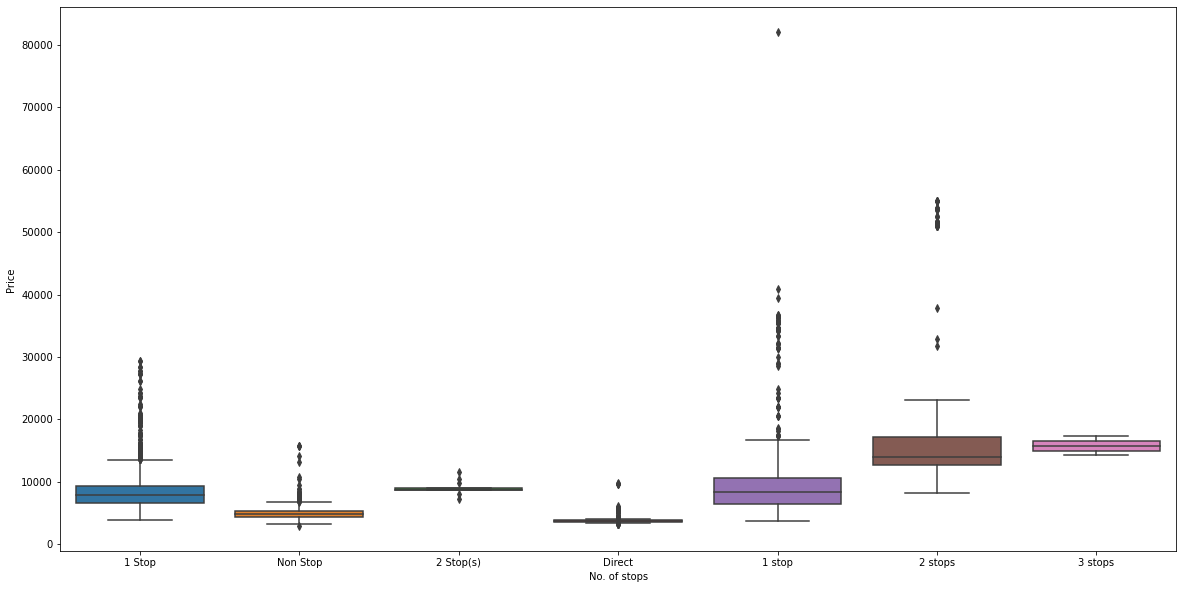

In [78]:
plt.figure(figsize=(20,10),facecolor='white')

sns.boxplot(data=df, x="No. of stops", y='Price ')


### NonStop/Direct < 1 stop<2stop<=3stop

### this data also shows prices in Yatra are less compared to Skyscanner

# Best days to book a ticket are

1)Direct Destination flights

2)Weekdays

3)a month apart fro your departure day

## Model Building

In [79]:
##Encoding

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3793
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             3747 non-null   object
 1   Orgin Place          3747 non-null   object
 2   Arrival Place        3747 non-null   object
 3   No. of stops         3747 non-null   object
 4   Price                3747 non-null   int32 
 5   _name_Depature Date  3747 non-null   int64 
 6   _name_Arival date    3747 non-null   int64 
 7   hour_Departure Time  3747 non-null   int64 
 8   Min_Departure Time   3747 non-null   int64 
 9   hour_Arrival Time    3747 non-null   int64 
 10  Min_Arrival Time     3747 non-null   int64 
 11  Day_Depature Date    3747 non-null   int64 
 12  Month_Depature Date  3747 non-null   int64 
 13  Day_Arival date      3747 non-null   int64 
 14  Month_Arival date    3747 non-null   int64 
 15  Duration_hour        3747 non-null   int32 
 16  Durati

In [80]:
df['No. of stops'] = df['No. of stops'].replace({'1 Stop':1,'Non Stop':0,'2 stops':2,'Direct':0,'1 stop':1,' 2 stop(s)':2,'3 stops':3,'2 Stop(s)':2},regex=True)

In [81]:
df['No. of stops'].unique()

array([1, 0, '2 Stop(s)', 2, 3], dtype=object)

In [82]:
df=df.replace('2 Stop(s)', np.nan)

In [83]:
df['No. of stops'] = df['No. of stops'].replace({np.nan:2},regex=True)

In [84]:
df['No. of stops'].unique()

array([1., 0., 2., 3.])

In [85]:
#!!pip install sklearn 
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()
df=bi_enc.fit_transform(df)
df


,Airlines_0,Airlines_1,Airlines_2,Airlines_3,Airlines_4,Orgin Place_0,Orgin Place_1,Arrival Place_0,Arrival Place_1,No. of stops,...,hour_Departure Time,Min_Departure Time,hour_Arrival Time,Min_Arrival Time,Day_Depature Date,Month_Depature Date,Day_Arival date,Month_Arival date,Duration_hour,Duration_min
0,0,0,0,0,1,0,1,0,1,1.0,...,9,25,17,15,26,6,26,6,7,50
1,0,0,0,1,0,0,1,0,1,1.0,...,19,35,5,30,6,5,7,5,9,55
2,0,0,0,1,0,0,1,0,1,1.0,...,19,35,0,40,6,5,7,5,5,5
3,0,0,0,0,1,0,1,0,1,1.0,...,5,20,11,30,16,6,16,6,6,10
4,0,0,0,0,1,0,1,0,1,1.0,...,9,25,17,15,16,5,16,5,7,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,0,0,0,1,0,1,1,1,0,1.0,...,19,10,23,55,7,5,7,5,4,45
3790,0,0,1,1,0,1,1,1,0,1.0,...,6,0,23,55,17,5,17,5,17,55
3791,0,1,1,1,0,1,1,1,0,2.0,...,6,10,23,55,7,5,7,5,17,45
3792,0,1,1,1,0,1,1,1,0,2.0,...,6,10,23,55,17,5,17,5,17,45


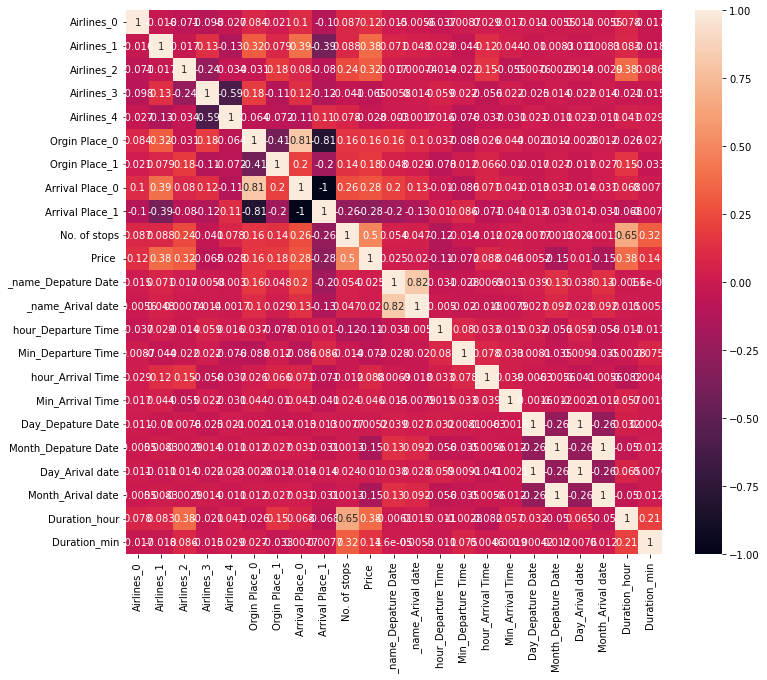

In [86]:
#Lets check if any of the columns are correlated
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()

In [87]:
df.columns

Index(['Airlines_0', 'Airlines_1', 'Airlines_2', 'Airlines_3', 'Airlines_4',
       'Orgin Place_0', 'Orgin Place_1', 'Arrival Place_0', 'Arrival Place_1',
       'No. of stops', 'Price ', '_name_Depature Date', '_name_Arival date',
       'hour_Departure Time', 'Min_Departure Time', 'hour_Arrival Time',
       'Min_Arrival Time', 'Day_Depature Date', 'Month_Depature Date',
       'Day_Arival date', 'Month_Arival date', 'Duration_hour',
       'Duration_min'],
      dtype='object')

In [ ]:
##Build a Model
x=df.drop(columns=['Price '],axis=1)
y=df['Price ']

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features=SelectKBest(score_func=f_classif, k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feaures_scores=pd.concat([df_scores,df_columns], axis=1)
feaures_scores.columns=['Score','feature Name']
feaures_scores.sort_values(['Score'], ascending=False)

,Score,feature Name
5,178.562007,Orgin Place_0
7,74.807370,Arrival Place_0
8,74.807370,Arrival Place_1
6,61.477666,Orgin Place_1
9,29.623264,No. of stops
2,22.863600,Airlines_2
1,13.449008,Airlines_1
20,12.988720,Duration_hour
4,7.628920,Airlines_4
3,7.211116,Airlines_3


In [90]:
### would go with 1st 13 parameters and drop rest for building the model
x=df.drop(columns=['Duration_min'],axis=1)
x=df.drop(columns=['hour_Arrival Time'],axis=1)
x=df.drop(columns=['hour_Departure Time'],axis=1)
x=df.drop(columns=['_name_Depature Date'],axis=1)
x=df.drop(columns=['Min_Arrival Time'],axis=1)
x=df.drop(columns=['Min_Departure Time'],axis=1)
x=df.drop(columns=['_name_Arival date'],axis=1)
x=df.drop(columns=['Day_Arival date'],axis=1)
x=df.drop(columns=['Day_Depature Date'],axis=1)

In [91]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(3747, 22)

In [92]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [93]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

1.0


In [94]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.9901221012938105


In [95]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.9997002403878672


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_clf=GradientBoostingRegressor()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

0.9998985801128499

### Will go with Random Forest Model

In [99]:
from sklearn.model_selection import cross_val_score
CS_RF=cross_val_score(RFR,x_scaled,y,cv=5)
CS_RF.mean()

0.9598070910305434

 Cross validation score is also promising and not overfitting
 
 ## Would not go with Hyperparmeter tunning as, the accuracy is satisfatory acheived
 
 Saving the Model

In [106]:
#Could not improve much on Hypertunning aftermultiple attems also.
with open("RFR", "wb") as f:
    pickle.dump(RFR, f)